In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from mnist import load_mnist 

train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [4]:
X = train[0]
labels = train[1]

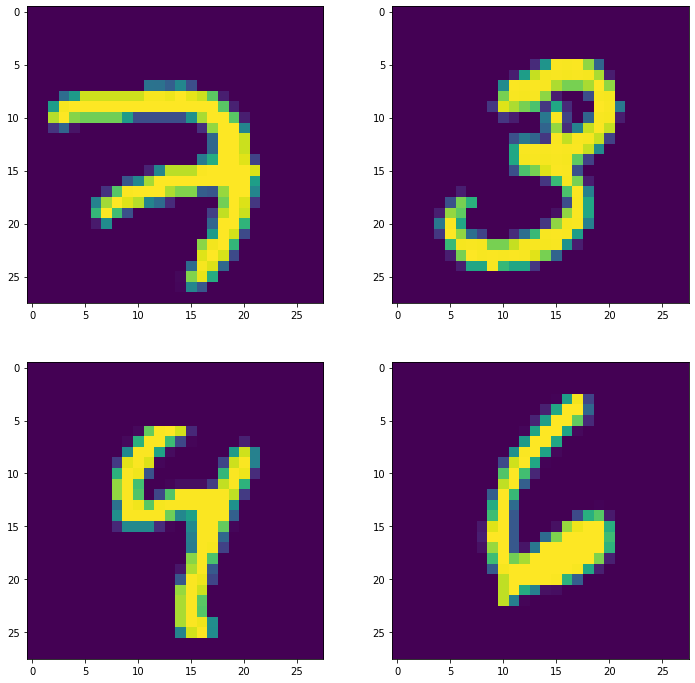

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for i in range(2):
    for j in range(2):
        axes[i,j].imshow(X[i * 2 + j])

In [102]:
class my_PCA(): 
    def __init__(self, n_components=None): 
        self.n_components = n_components
     
    def fit(self, X):
        self.X = X
        self.Xc = self.X - self.X.mean(axis=0)
        self.Xc = self.Xc / (self.Xc.std(axis=0) + 1e-8)
        self.C = self.Xc.T.dot(self.Xc)
        self.lymbda, self.F = np.linalg.eigh(self.C)
        self.lymbda = self.lymbda[::-1]
        self.F = self.F[:, ::-1]
        pass
     
    def transform(self):
        self.Y = np.dot(self.Xc, self.F[:, : self.n_components])
        print(self.Y)
        pass
     
    def fit_transform(self, Y):
        pass

In [103]:
X = X.astype('float64')
X = X.reshape(-1, 784)
pca = my_PCA(2)
pca.fit(X)
pca.transform()

[[-1.79618427 13.66970212]
 [ 0.53937999 -5.29906678]
 [ 3.47238724  4.8097072 ]
 ...
 [ 3.78513418 -3.34577073]
 [-1.74304505 -4.97150678]
 [ 1.36341209 -6.2870059 ]]


0.09747195309034958

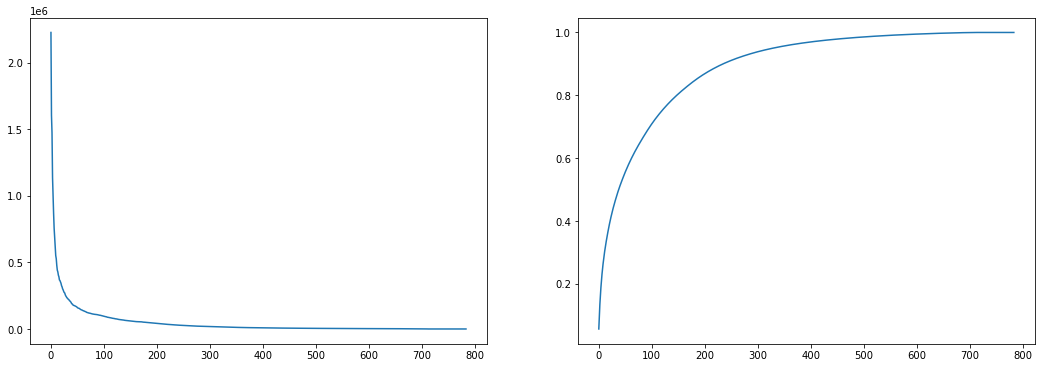

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
lymbda = pca.lymbda
lymbda_cumsum = np.cumsum(lymbda,axis=0)
lymbda_sum = np.sum(lymbda)
axes[0].plot(lymbda)
axes[1].plot(lymbda_cumsum / lymbda_sum)
np.sum(lymbda[:2] / lymbda_sum)

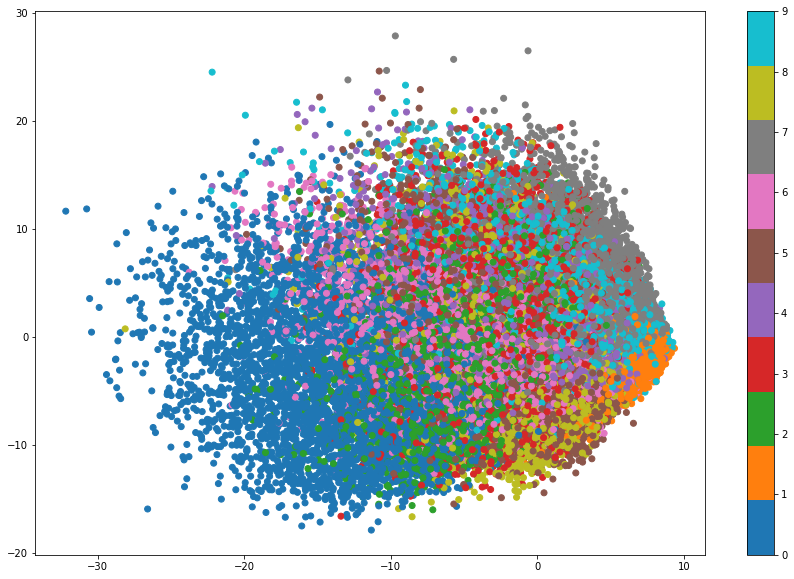

In [105]:
x = pca.Y[:, 0]
y = pca.Y[:, 1]
plt.figure(figsize=(15, 10))
plt.scatter(x, y, c=labels, cmap='tab10')
plt.colorbar()

In [ ]:
class my_kNN(): 
    def __init__(self, n_neighbors=5): 
        self.n_neighbors = n_neighbors
 
    def fit(X, y): 
        self.X = X
        self.y = y
 
    def predict(point):
        y_pred = []
        for i in range(len(X)):
            distances = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            y_pred.append(np.bincount(nearest_labels).argmax())
        return np.array(y_pred)
        
        pass 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, train_size=0.67, random_state=42)
#посчитать расстояния до всех точек. Выбрать k самых близких. Методом голосования определить класс